**Package Required**

In [15]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [16]:
data = pd.read_csv('../content/sample_data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


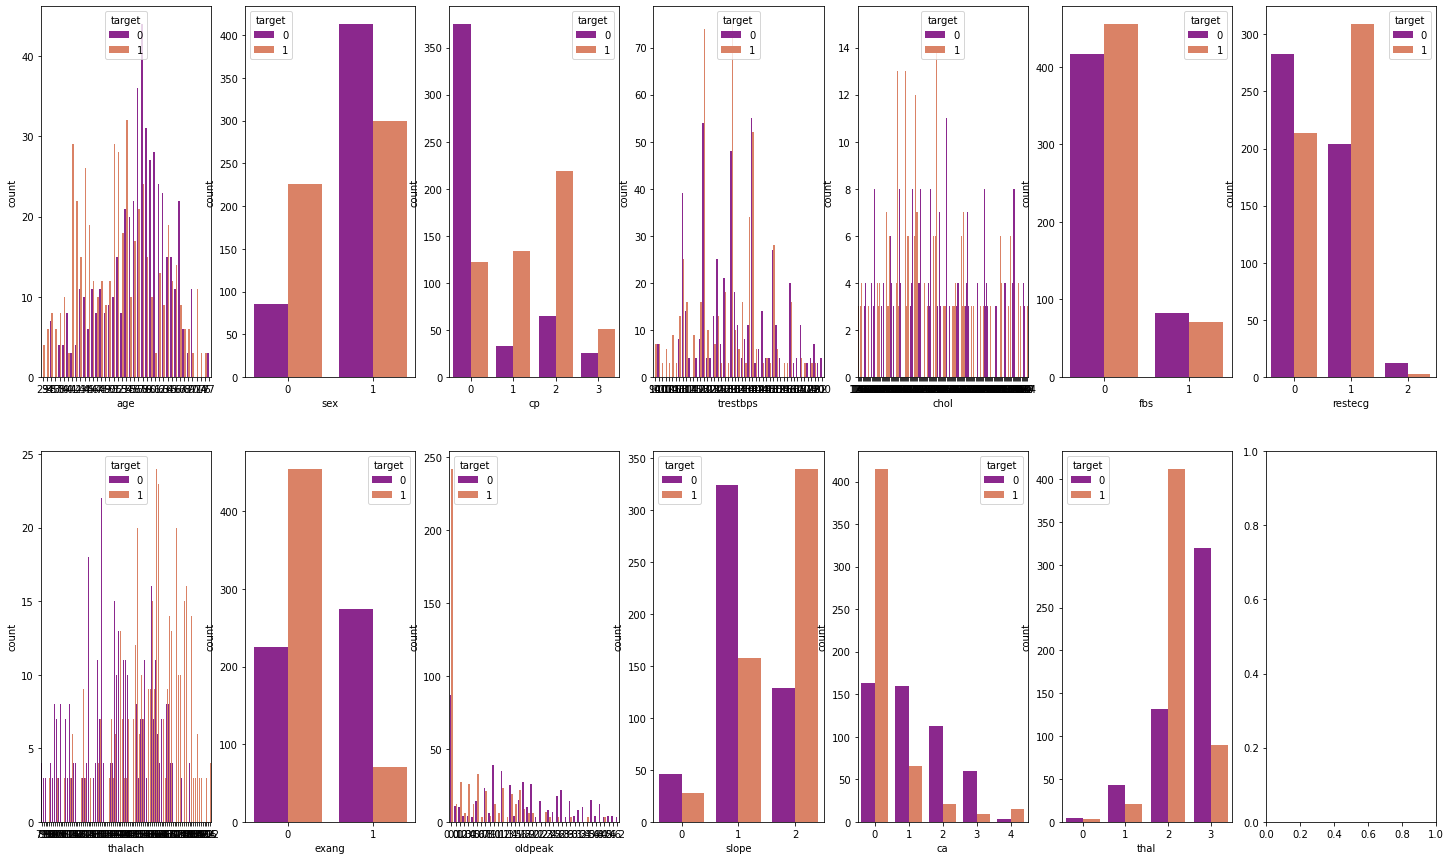

In [18]:
fig, ax = plt.subplots(2,7,figsize = (25, 15))
significant_data=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

i=0
j=0
for z in significant_data:
  sns.countplot(x =z, data= data, hue= 'target', ax= ax[i,j], palette= 'plasma')
  j+=1
  if j==7:
    j=0
    i+=1
# sns.countplot(x ='sex', data= data, hue= 'target', ax= ax[1,2], palette= 'plasma')

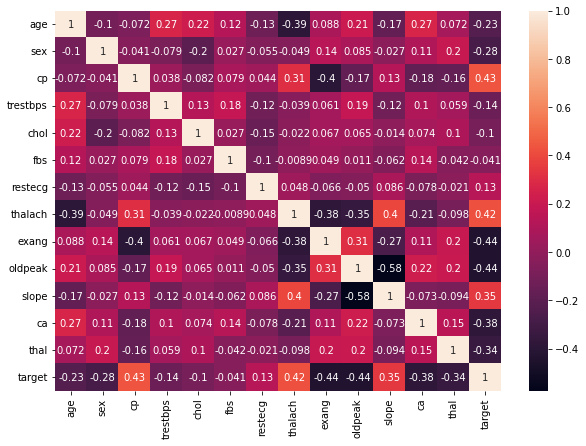

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# print("The data to be plotted:\n")
# print(data)
cor= data.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(cor,annot=True)

In [20]:
significant_data=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

for i in significant_data:
  print(data[i].value_counts())
  
# data["fbs"].value_counts()
# data["oldpeak"].value_counts()


58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64
1    713
0    312
Name: sex, dtype: int64
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3


We will take columns with unique values more than 6 and plot the rowsto boxplot to see if we have too many detached values that will hamper the result of our training model.

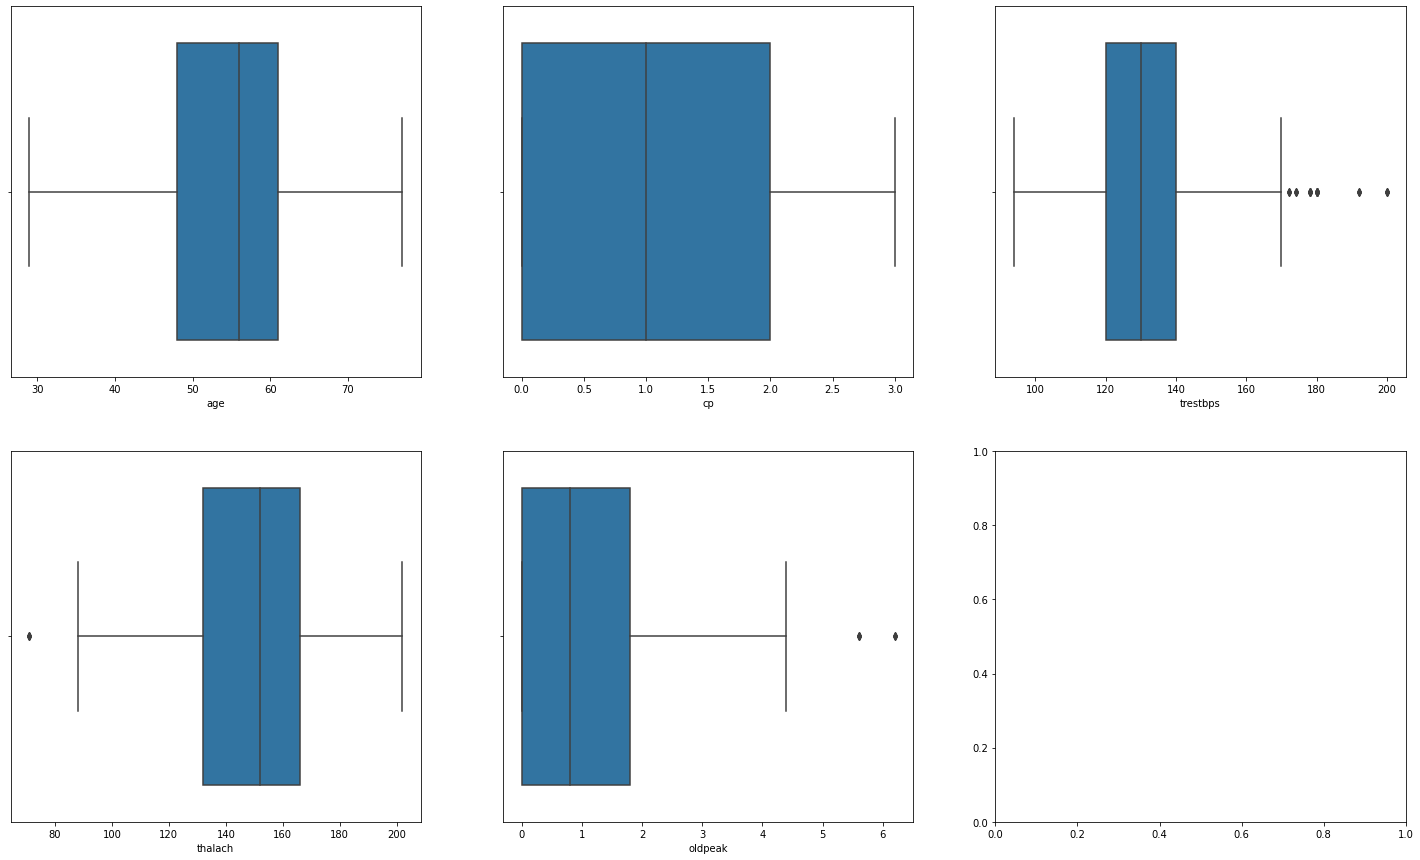

In [21]:
significant_data=['age','cp','trestbps','thalach','oldpeak']

fig, ax = plt.subplots(2,3,figsize = (25, 15))
i=0
j=0
for z in significant_data:
  sns.boxplot(data=data, x=z, ax=ax[i,j])
  j+=1
  if j==3:
    j=0
    i+=1
# sns.boxplot(data=data, x='age', ax=ax[0])
# sns.boxplot(data=data, x='trestbps', ax=ax[1])

# for col in ['trestbps']:
#     data[col] = np.log(data[col])

# sns.boxplot(data=data, x='trestbps', ax=ax[2])


In [22]:

for col in ['trestbps']:
    data[col] = np.log(data[col])


In [23]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Accuracy of Logistic Regression: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        98
           1       0.82      0.93      0.87       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



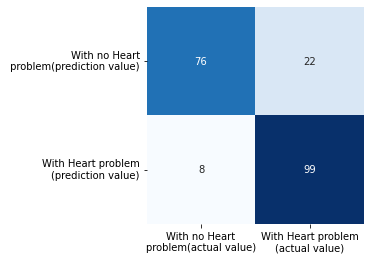

In [25]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))
sns.heatmap(lr_conf_matrix, xticklabels=["With no Heart"+"\n"+"problem(actual value)","With Heart problem"+"\n"+"(actual value)"],yticklabels=["With no Heart"+"\n"+" problem(prediction value)","With Heart problem"+"\n"+"(prediction value)"], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)



Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



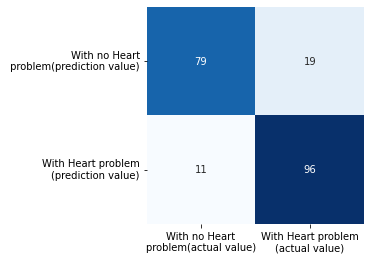

In [26]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))
sns.heatmap(nb_conf_matrix, xticklabels=["With no Heart"+"\n"+"problem(actual value)","With Heart problem"+"\n"+"(actual value)"],yticklabels=["With no Heart"+"\n"+" problem(prediction value)","With Heart problem"+"\n"+"(prediction value)"], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)



Accuracy of Random Forest: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



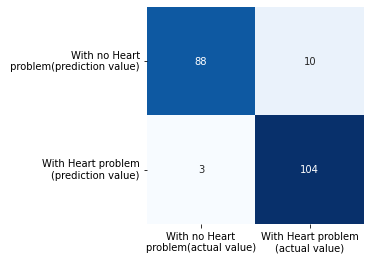

In [27]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
sns.heatmap(rf_conf_matrix, xticklabels=["With no Heart"+"\n"+"problem(actual value)","With Heart problem"+"\n"+"(actual value)"],yticklabels=["With no Heart"+"\n"+" problem(prediction value)","With Heart problem"+"\n"+"(prediction value)"], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)



Accuracy of K-NeighborsClassifier: 87.3170731707317 

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        98
           1       0.86      0.90      0.88       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



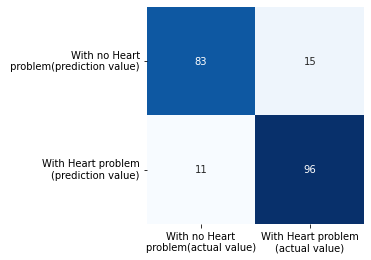

In [28]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))
sns.heatmap(knn_conf_matrix, xticklabels=["With no Heart"+"\n"+"problem(actual value)","With Heart problem"+"\n"+"(actual value)"],yticklabels=["With no Heart"+"\n"+" problem(prediction value)","With Heart problem"+"\n"+"(prediction value)"], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)